# Decision Tree

- Decision tree is a supervised learning technique that can be used for both classification and regression problems, but mostly it is preferred for solving classification problems.

- In order to build a tree, we use the CART algorithm, which stands for classification and Regression Tree Algorithm

**<u>Important Terminology related to Decision Trees:</u>**

- **Root Node:** It represents the entire population or sample and this further gets divided into two or more homogeneous sets.

- **Splitting:** It is process of dividing a node into two or more sub-nodes.

- **Decision:** When a sub-node splits into further sub-nodes, then it is called the decision node.

- **Leaf / Terminal Node:** Nodes do not split is called leaf or Treminal node.

- **Pruning:** When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.

- **Brach / Sub-Tree:** A subsection of the entire tree is called branch or sub-tree.

- **Parent and Child Node:** A node which is divided into sub-nodes is called parent node of sub-node whereas sub-nodes are the child of a parent node.

##### Attribute selection Measures

This measurement, we can easily select the best attribut for thr the nodes of the tree. There are two techniques for ASM, which are:

- Information Gain
- Entropy / Gini Index

**Information Gain:** It is the measurement of changes in entropy after the segmentation of a dataset based on an attribute. It calculates how much information a feature provides us about a class.

                **Information Gain = Entropy(s) -[(wieghted AVG) * Entropy(each feature)]** 

**Entropy:** Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data.

                 **Entropy(s) = -P(yes) log2 P(yes) - P(no) log2 P(no)**

where:
s = Total number of samples
P(yes) = Probability of yes
P(no) = Probability of no

**Gini Index:** 
- Gini Index is a measure of impurity or purity used while creating a decision tree in CART Algorithm.
- An attribute with low Gini index should be preferred as compared to high Gini Index.

                    **Gini index = 1 - sum of p^2**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"/workspaces/Data_Science_Notes/machine_learning/supervised_learning_in_ml/classification/data/Social_Network_Ads.csv")

In [3]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset = dataset.drop(columns = ["User ID", "Gender"])

In [5]:
dataset.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
x = dataset.iloc[:, : -1]
y = dataset["Purchased"]

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x), columns = x.columns)

In [8]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

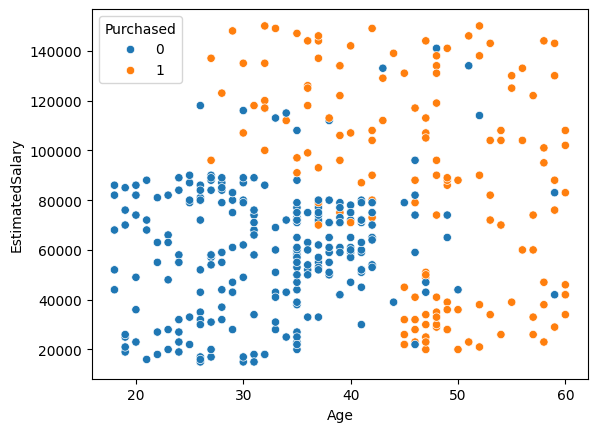

In [9]:
sns.scatterplot(x = "Age", y = "EstimatedSalary", data = dataset, hue = "Purchased")

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtc = DecisionTreeClassifier(max_depth = 3)
dtc.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
dtc1 = DecisionTreeClassifier(criterion="entropy")
dtc1.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
dtc.score(x_train, y_train)*100

91.33333333333333

In [26]:
dtc.score(x_test, y_test)*100

92.0

In [16]:
dtc1.score(x_test, y_test)*100

83.0

In [27]:
dtc.predict([[19, 19000]])

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.2 MB/s  0:00:00 eta 0:00:01


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

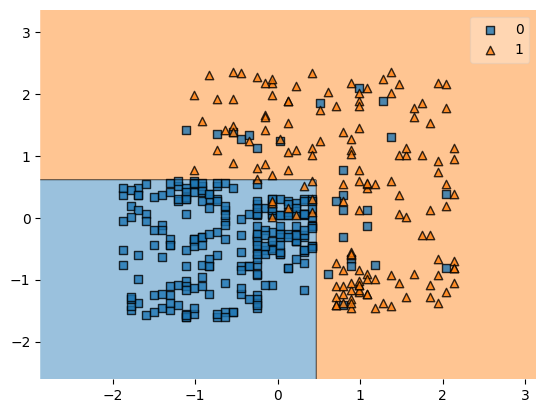

In [28]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = dtc)

In [21]:
from sklearn.tree import plot_tree

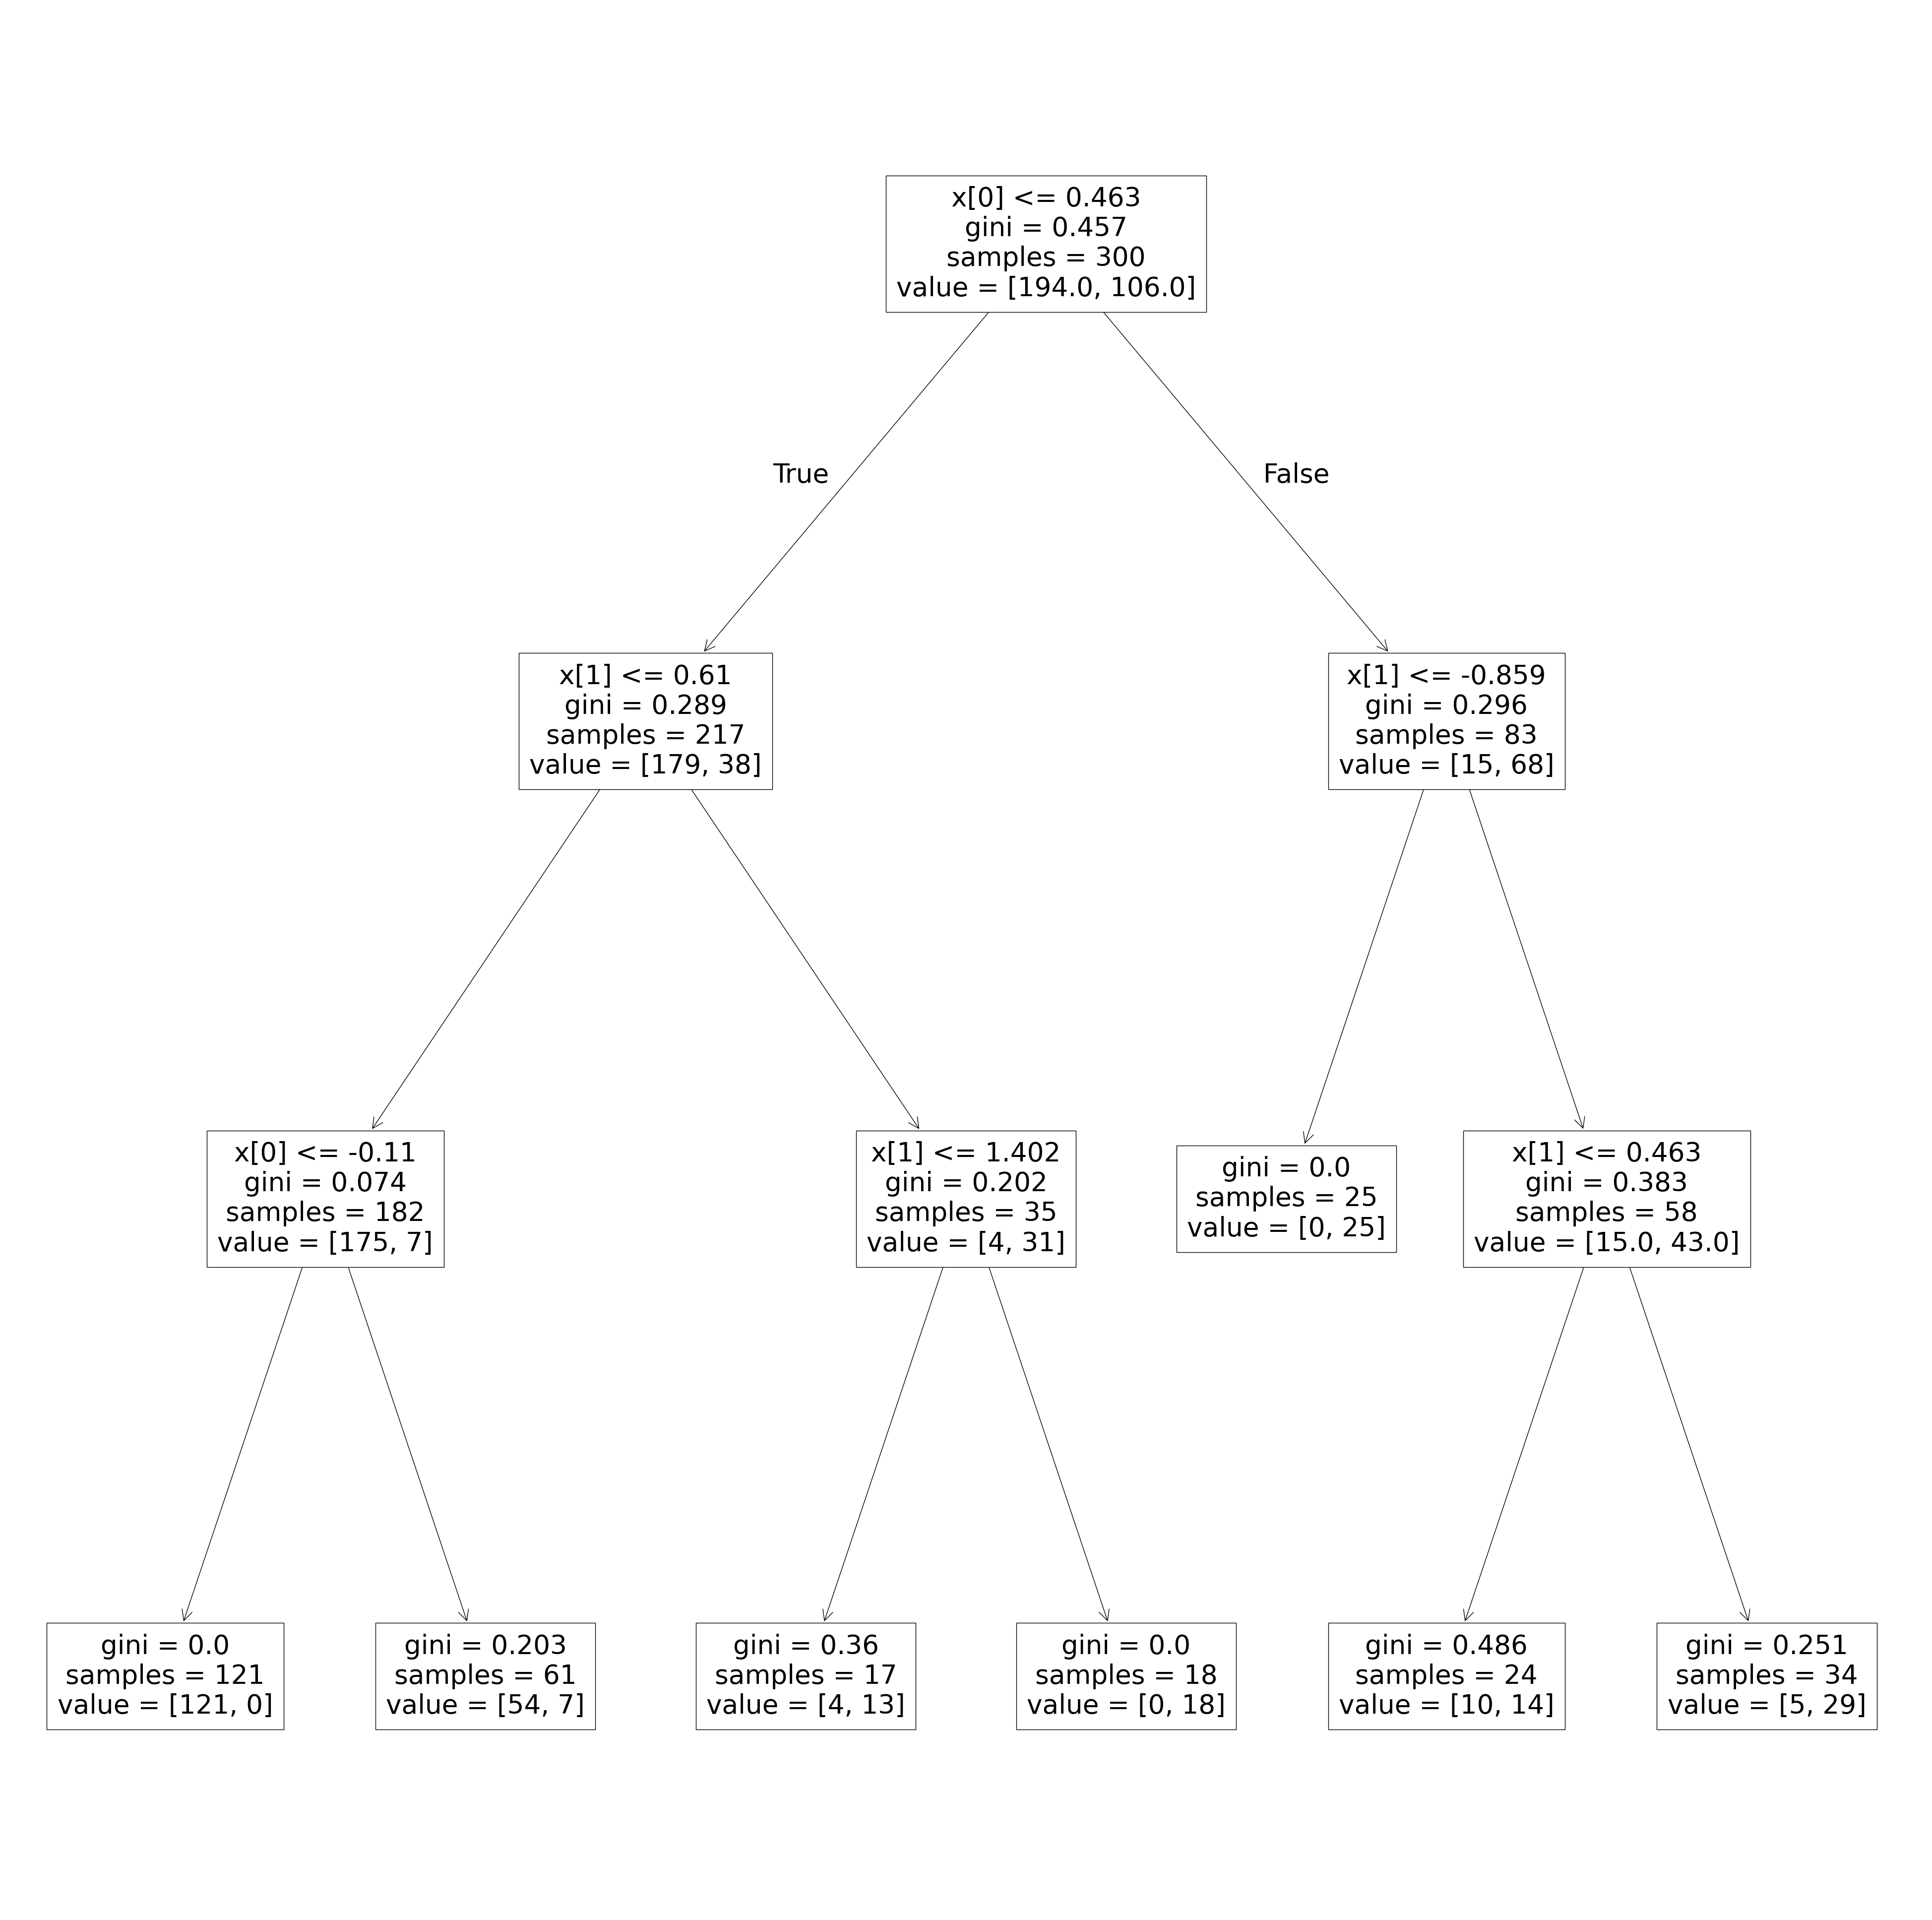

In [29]:
plt.figure(figsize = (50, 50))
plot_tree(dtc)
plt.savefig("demo.jpg")
plt.show()

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

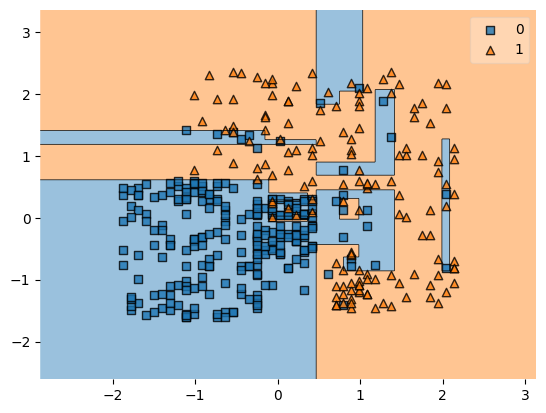

In [22]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = dtc1)

# Pruning 

**There are two types of pruning:**
1. Pre-Pruning
2. Post-Pruning

In [23]:
for i in range(1,20):
    dtc2 = DecisionTreeClassifier(max_depth = i)
    dtc2.fit(x_train, y_train)
    print(dtc2.score(x_train, y_train)*100, dtc2.score(x_test, y_test)*100, i)

82.33333333333334 89.0 1
91.33333333333333 92.0 2
91.33333333333333 92.0 3
93.33333333333333 91.0 4
93.33333333333333 89.0 5
95.33333333333334 90.0 6
97.0 87.0 7
97.66666666666667 83.0 8
98.66666666666667 85.0 9
99.0 84.0 10
99.0 82.0 11
99.0 83.0 12
99.33333333333333 84.0 13
99.66666666666667 84.0 14
99.66666666666667 84.0 15
99.66666666666667 84.0 16
99.66666666666667 84.0 17
99.66666666666667 84.0 18
99.66666666666667 84.0 19
